<a href="https://colab.research.google.com/github/sumukhbhat12/Machine-Learning-Course-FreeCodeCamp/blob/main/Seoul_Bike_Sharing_Demand_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ["Date", "Rented Bike count", "Hour", "Temperature", "Humidity", "Windspeed", "Visibility", "Dew point temperature", "Solar radiation", "Rainfall", "Snowfall", "Seasons" , "Holiday", "Functional Day"]
print(len(dataset_cols))

14


In [22]:
data = pd.read_csv('/content/SeoulBikeDataNoColHead.csv', names=dataset_cols)

In [5]:
data.head(10)

,Date,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functional Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01-12-2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01-12-2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01-12-2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01-12-2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01-12-2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


Dropping Unneeded Columns

In [23]:
data = data.drop(['Date', 'Holiday', 'Seasons'], axis=1)
print(data.head())

   Rented Bike count  Hour  Temperature  Humidity  Windspeed  Visibility  \
0                254     0         -5.2        37        2.2        2000   
1                204     1         -5.5        38        0.8        2000   
2                173     2         -6.0        39        1.0        2000   
3                107     3         -6.2        40        0.9        2000   
4                 78     4         -6.0        36        2.3        2000   

   Dew point temperature  Solar radiation  Rainfall  Snowfall Functional Day  
0                  -17.6              0.0       0.0       0.0            Yes  
1                  -17.6              0.0       0.0       0.0            Yes  
2                  -17.7              0.0       0.0       0.0            Yes  
3                  -17.6              0.0       0.0       0.0            Yes  
4                  -18.6              0.0       0.0       0.0            Yes  


Convert the Functional Day column into 0s and 1s

In [24]:
data['Functional Day'] = (data['Functional Day'] == 'Yes').astype(int)
print(data.head())

   Rented Bike count  Hour  Temperature  Humidity  Windspeed  Visibility  \
0                254     0         -5.2        37        2.2        2000   
1                204     1         -5.5        38        0.8        2000   
2                173     2         -6.0        39        1.0        2000   
3                107     3         -6.2        40        0.9        2000   
4                 78     4         -6.0        36        2.3        2000   

   Dew point temperature  Solar radiation  Rainfall  Snowfall  Functional Day  
0                  -17.6              0.0       0.0       0.0               1  
1                  -17.6              0.0       0.0       0.0               1  
2                  -17.7              0.0       0.0       0.0               1  
3                  -17.6              0.0       0.0       0.0               1  
4                  -18.6              0.0       0.0       0.0               1  


In [15]:
print(data['Hour'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [16]:
print(len(data))

8760


there are 24 different values for hour, let us take a dataset with only 1 unique hour value

In [25]:
data = data[data['Hour'] == 12]

In [26]:
print(len(data))
print(data.head())

365
     Rented Bike count  Hour  Temperature  Humidity  Windspeed  Visibility  \
12                 449    12          1.7        23        1.4        2000   
36                 479    12          4.3        41        1.3        1666   
60                 333    12          5.8        85        1.7         349   
84                 393    12         -0.3        38        4.8        1823   
108                321    12         -2.3        25        0.0        1962   

     Dew point temperature  Solar radiation  Rainfall  Snowfall  \
12                   -17.2             1.11       0.0       0.0   
36                    -7.8             1.09       0.0       0.0   
60                     3.4             0.43       0.0       0.0   
84                   -12.9             1.11       0.0       0.0   
108                  -19.7             0.00       0.0       0.0   

     Functional Day  
12                1  
36                1  
60                1  
84                1  
108           

In [27]:
data = data.drop(['Hour'],axis=1)
print(data.head())

     Rented Bike count  Temperature  Humidity  Windspeed  Visibility  \
12                 449          1.7        23        1.4        2000   
36                 479          4.3        41        1.3        1666   
60                 333          5.8        85        1.7         349   
84                 393         -0.3        38        4.8        1823   
108                321         -2.3        25        0.0        1962   

     Dew point temperature  Solar radiation  Rainfall  Snowfall  \
12                   -17.2             1.11       0.0       0.0   
36                    -7.8             1.09       0.0       0.0   
60                     3.4             0.43       0.0       0.0   
84                   -12.9             1.11       0.0       0.0   
108                  -19.7             0.00       0.0       0.0   

     Functional Day  
12                1  
36                1  
60                1  
84                1  
108               1  


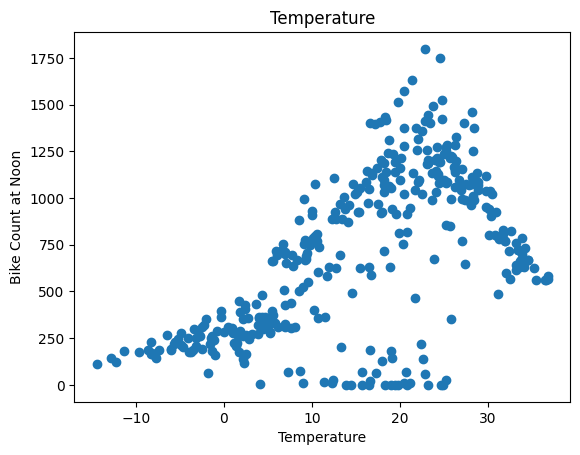

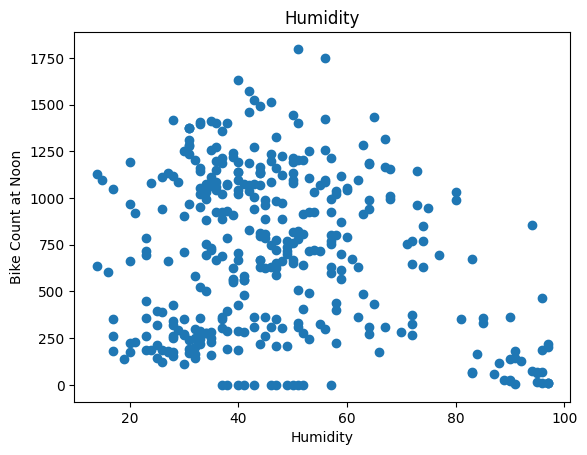

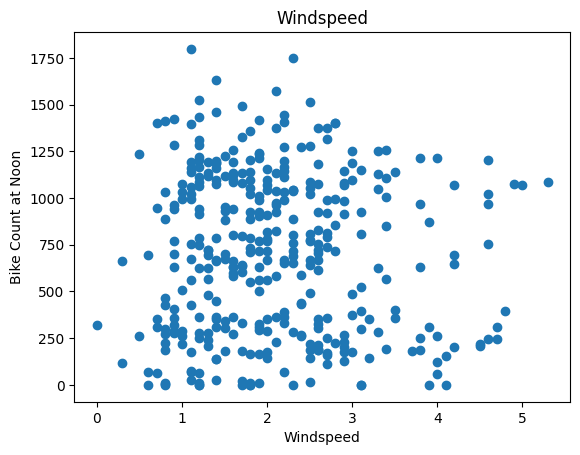

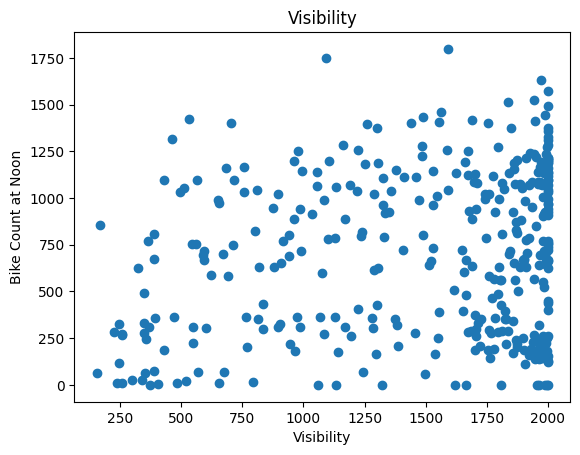

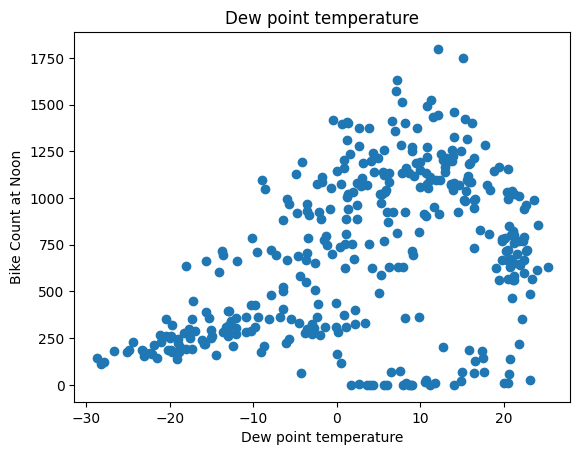

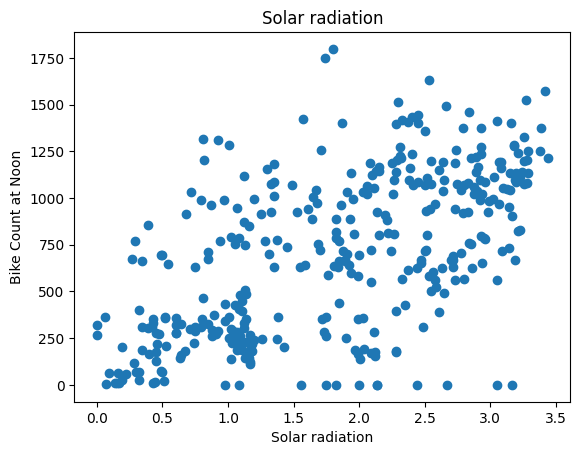

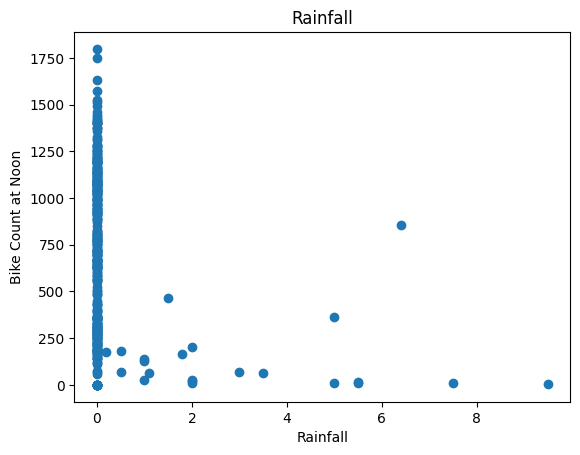

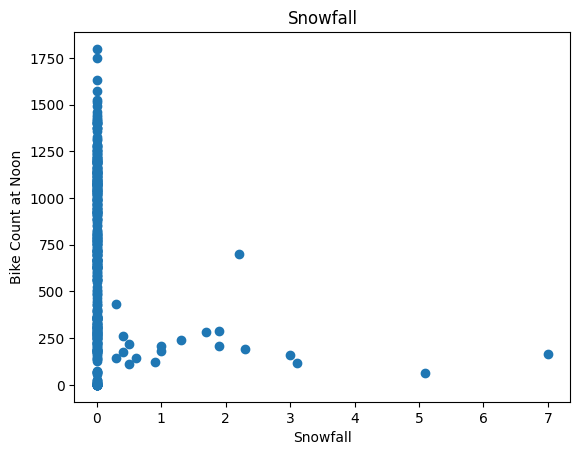

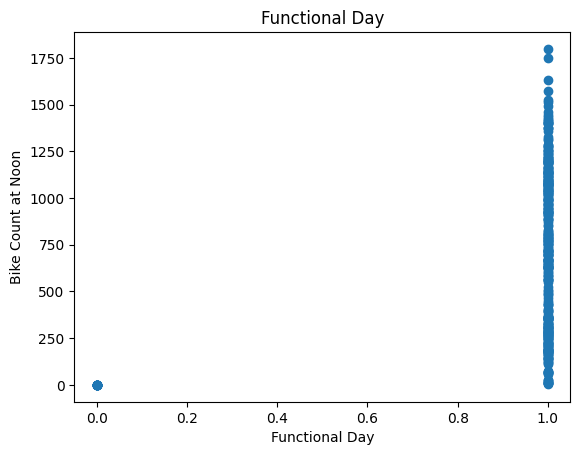

In [28]:
for label in data.columns[1:]:
  plt.scatter(data[label], data['Rented Bike count'])
  plt.title(label)
  plt.ylabel('Bike Count at Noon')
  plt.xlabel(label)
  plt.show()

From the above plots, we notice that wind, visibility and functional don't seem to have a linear relationship, hence we drop those columns

In [30]:
data = data.drop(['Windspeed', 'Visibility', 'Functional Day'], axis=1)
print(data.head())

     Rented Bike count  Temperature  Humidity  Dew point temperature  \
12                 449          1.7        23                  -17.2   
36                 479          4.3        41                   -7.8   
60                 333          5.8        85                    3.4   
84                 393         -0.3        38                  -12.9   
108                321         -2.3        25                  -19.7   

     Solar radiation  Rainfall  Snowfall  
12              1.11       0.0       0.0  
36              1.09       0.0       0.0  
60              0.43       0.0       0.0  
84              1.11       0.0       0.0  
108             0.00       0.0       0.0  


Split into Training, Validation, Test datasets

In [32]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])
print(len(train),len(valid),len(test))

219 73 73


x_label is the features vector(in 2D) and y_label is the target vector(in 2D)

In [48]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels)==1:
      X = dataframe[x_labels[0]].values.reshape(-1,1) #convert to 2D
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))
  return data,X,y

In [39]:
_, X_train_temp, y_train_temp = get_xy(train, 'Rented Bike count', x_labels=["Temperature"])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'Rented Bike count', x_labels=["Temperature"])
_, X_test_temp, y_test_temp = get_xy(test, 'Rented Bike count', x_labels=["Temperature"])

#Simple Linear Regression

In [41]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

Linear Regression is y = mx + c, where x represents the Temperature
here c = 362.3613 and m = 21.7006

In [42]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.70066047]] [362.36132233]


R2 score is a measure of the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

In [43]:
temp_reg.score(X_test_temp, y_test_temp)

0.2671271395717342

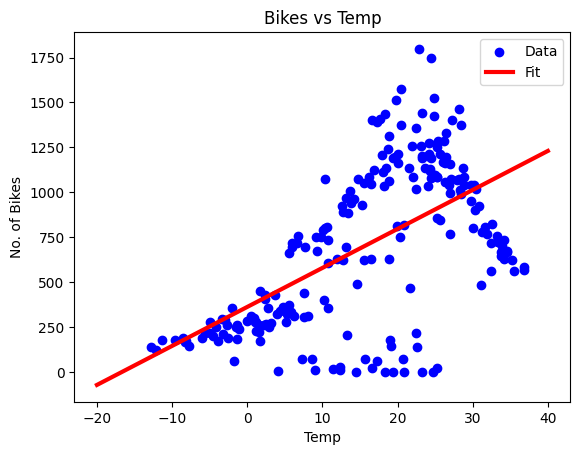

In [46]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)   #generates evenly spaced values --> 100 values between -20.0 and 40.0
#plot the linear regression line in red
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('No. of Bikes')
plt.xlabel('Temp')
plt.show()

#Multiple Linear Regression

In [47]:
data.head()

,Rented Bike count,Temperature,Humidity,Dew point temperature,Solar radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [49]:
_, X_train, y_train = get_xy(train, 'Rented Bike count', x_labels=data.columns[1:])
_, X_valid, y_valid = get_xy(valid, 'Rented Bike count', x_labels=data.columns[1:])
_, X_test, y_test = get_xy(test, 'Rented Bike count', x_labels=data.columns[1:])

In [51]:
all_reg = LinearRegression()
all_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
all_reg.score(X_train,y_train)

0.5103466554370919